In [2]:
import pandas as pd
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, mapping
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import regionmask
import xesmf as xe
import cmocean

import sys
sys.path.append('../')
import utils
import plotting

import math

# Import Data and Count mortalities

In [3]:
ds_o3 = xr.open_zarr('./final_data/o3_mortalities.zarr')
ds_PM = xr.open_zarr('./final_data/pm_mortalities.zarr')

In [4]:
print(ds_o3['Δmortality'].mean(dim = 'draws').sum().values)
print(ds_PM['Δmortality'].sum().values)

2494.4017156085315
7759.918775261735


/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## monetization of the health impacts


In [5]:
VSL = 7.4E6
print("{:e}".format((ds_o3['Δmortality'].mean(dim = 'draws').sum()*VSL).values))
print("{:e}".format((ds_PM['Δmortality'].sum()*VSL).values))

/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


1.845857e+10
5.742340e+10


In [6]:
"{:e}".format((ds_o3['Δmortality'].mean(dim = 'draws').sum()*VSL).values + (ds_PM['Δmortality'].sum()*VSL).values)

/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


'7.588197e+10'

# Plot

/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


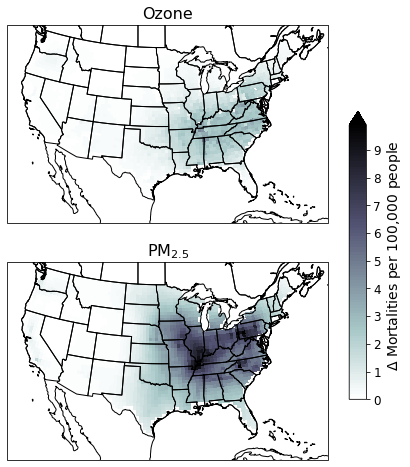

In [25]:
fig = plt.figure(figsize=[16,8])
ax_o3 = fig.add_subplot(2,1,1, projection=ccrs.LambertConformal())
pc = (1e5*ds_o3['Δmortality'].mean(dim = 'draws')/ds_o3['regrid_pop_count']).plot(ax = ax_o3,  
                                                                                  add_colorbar=False, 
                                                                                  cmap = 'bone_r',transform=ccrs.PlateCarree(),
                                                                                  levels = np.squeeze(np.arange(0,10,.1)), 
                                                                                  extend = 'max')
ax_o3.set_title('Ozone', fontsize = 16)
ax_o3.add_feature(cfeat.STATES)
ax_o3.coastlines()
ax_o3.set_extent([-120,-70,20,50])

ax_pm = fig.add_subplot(2,1,2, projection=ccrs.LambertConformal())
(1e5*ds_PM['Δmortality']/ds_PM['regrid_pop_count']).plot(ax = ax_pm, 
                                                         add_colorbar=False, cmap = 'bone_r',
                                                         transform=ccrs.PlateCarree(),
                                                         levels = np.squeeze(np.arange(0,10,.1)), 
                                                         extend = 'max')
ax_pm.set_title(r'PM$_{2.5}$', fontsize = 16)
ax_pm.add_feature(cfeat.STATES)
ax_pm.coastlines()
ax_pm.set_extent([-120,-70,20,50])


cbar_ax = fig.add_axes([0.67, 0.23, 0.015, 0.5])
cb = fig.colorbar(pc, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 

cb.set_label(label = '$\Delta$ Mortalities per 100,000 people', fontsize=14)
cb.ax.tick_params(labelsize='large')


plt.savefig('./Figures/mortalities.png', bbox_inches = 'tight', dpi = 150)